In [2]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

# Augmentation 연습

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np

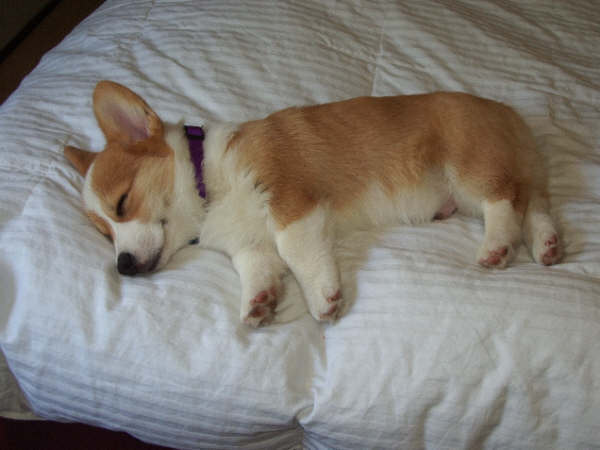

In [4]:
img = load_img('test_img/image.jpg')
img

In [5]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [6]:
data = img_to_array(img) # change to numpy array 

print(type(data), data.shape) 

<class 'numpy.ndarray'> (450, 600, 3)


In [7]:
sample = data[np.newaxis, ...] # 데이터 개수를 의미하는 축 추가

sample.shape # 1개 데이터, 사진 크기 (450*600), RGB(색상)

(1, 450, 600, 3)

In [8]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

ERROR! Session/line number was not unique in database. History logging moved to new session 244


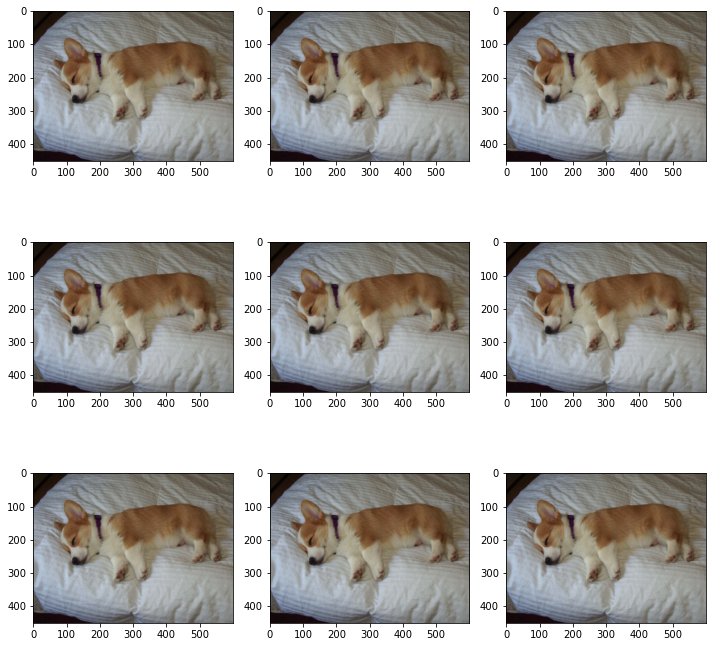

In [9]:
# Generator 생성
datagen = ImageDataGenerator()
# datagen = ImageDataGenerator(rescale=1./255)
# datagen = ImageDataGenerator(width_shift_range=0.5)
# datagen = ImageDataGenerator(height_shift_range=[-200,200])
# datagen = ImageDataGenerator(shear_range=40., fill_mode='constant')
# datagen = ImageDataGenerator(rotation_range=40, fill_mode='reflect')
# datagen = ImageDataGenerator(zoom_range=2, fill_mode='constant')
# datagen = ImageDataGenerator(shear_range=5, fill_mode='constant', cval=255)
# datagen = ImageDataGenerator(brightness_range=(0.3,1.3))
# datagen = ImageDataGenerator(horizontal_flip=True)



fig = plt.figure(figsize=(10,10))
iterator = datagen.flow(sample, batch_size=1)

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    img = batch[0].astype('uint8') 
    plt.imshow(img)

plt.tight_layout()
plt.show()    

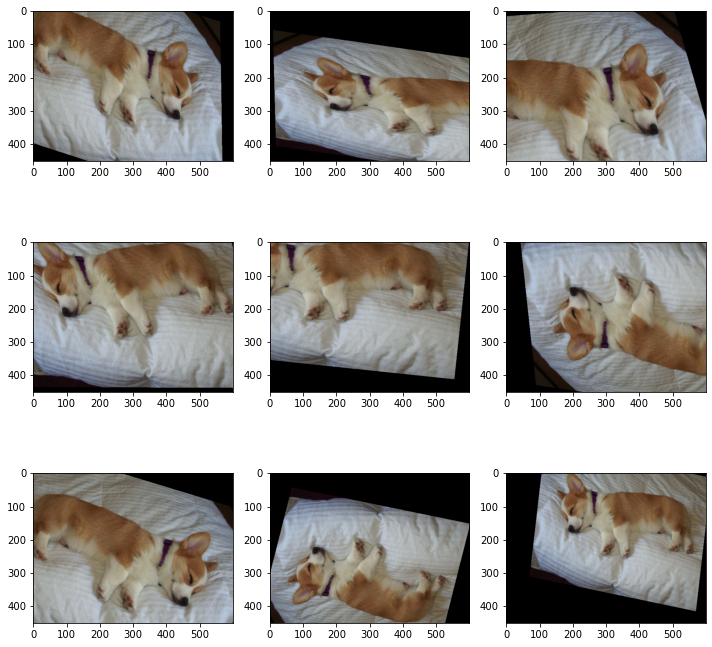

In [10]:
datagen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.3,
                            shear_range=20,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='constant')

fig = plt.figure(figsize=(10,10))
iterator = datagen.flow(sample, batch_size=1)

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    img = batch[0].astype('uint8') 
    plt.imshow(img)

plt.tight_layout()
plt.show()    

# 개와 고양이 분류 문제

In [11]:
# 일반적으로 url을 이용해서 파일 다운 받을 때.
# import urllib.request
# url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
# filename = 'cats_and_dogs_small.zip'
# urllib.request.urlretrieve(url, filename)

('cats_and_dogs_small.zip', <http.client.HTTPMessage at 0x2a32989c508>)

In [ ]:
# 구글 코랩에서 실행할 때.
# import gdown

# url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
# fname = 'cats_and_dogs_small.zip'

# gdown.download(url, fname, quiet=False)

## 구글 드라이브에 업로드된 파일 다운로드

In [12]:
!pip install googledrivedownloader

In [13]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU',
                                    dest_path='./data/cats_and_dogs_small.zip',
                                    unzip=True)

Unzipping...Done.


## 하이퍼 파라미터 정의

In [2]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 32

IMAGE_SIZE = 224

## 이미지데이터 제너레이터 생성

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_dir = "data/train"
valid_dir = "data/validation"
test_dir = "data/test"

ERROR! Session/line number was not unique in database. History logging moved to new session 224


In [9]:
# scaling을 위해 255로 나눔
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

## flow_from_directory 방식
- 하위 디렉토리에 클래스별 사진 분류 후 상위 디렉토리를 읽어옴.
- \train_dir\cats ; 클래스 0번 
- \train_dir\dogs ; 클래스 1번

In [10]:
train_iter = train_datagen.flow_from_directory(train_dir,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), #리사이징
                                               class_mode='binary',
                                               batch_size=N_BATCHS)

valid_iter = valid_datagen.flow_from_directory(valid_dir, 
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                               class_mode='binary', 
                                               batch_size=N_BATCHS)

test_iter = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             class_mode='binary', 
                                             batch_size=N_BATCHS)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 트러블 슈팅

**flow_from_directory 명령어를 실행했을 때 아래와 같은 에러메세지 발생**

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

구글링을 통해 확인해본 결과 
1. 텐서플로우와 케라스의 버전 충돌 문제.
    - 현재 텐서플로우 버전 확인(2.1) 및 호환되는 케라스 버전 설치(2.3.1) 
    → 이슈해결
    

## 각 클래스 확인

In [11]:
train_iter.class_indices

{'cats': 0, 'dogs': 1}

In [12]:
len(train_iter), len(valid_iter), len(test_iter)

(63, 32, 32)

In [21]:
# batch_size 확인
batch = next(train_iter)
print(type(batch))
print(type(batch[0]), type(batch[1]))
print(batch[0].shape, batch[1].shape)

<class 'tuple'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(32, 224, 224, 3) (32,)


In [14]:
batch[1][:10]

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0.], dtype=float32)

In [16]:
# 스케일링 값 확인
import numpy as np
np.min(batch[0][0]), np.max(batch[0][0])

(0.0, 1.0)

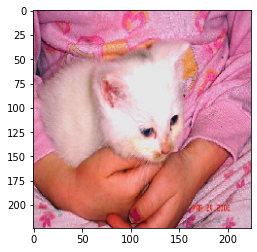

In [17]:
import matplotlib.pyplot as plt
plt.imshow(batch[0][0])
plt.show()

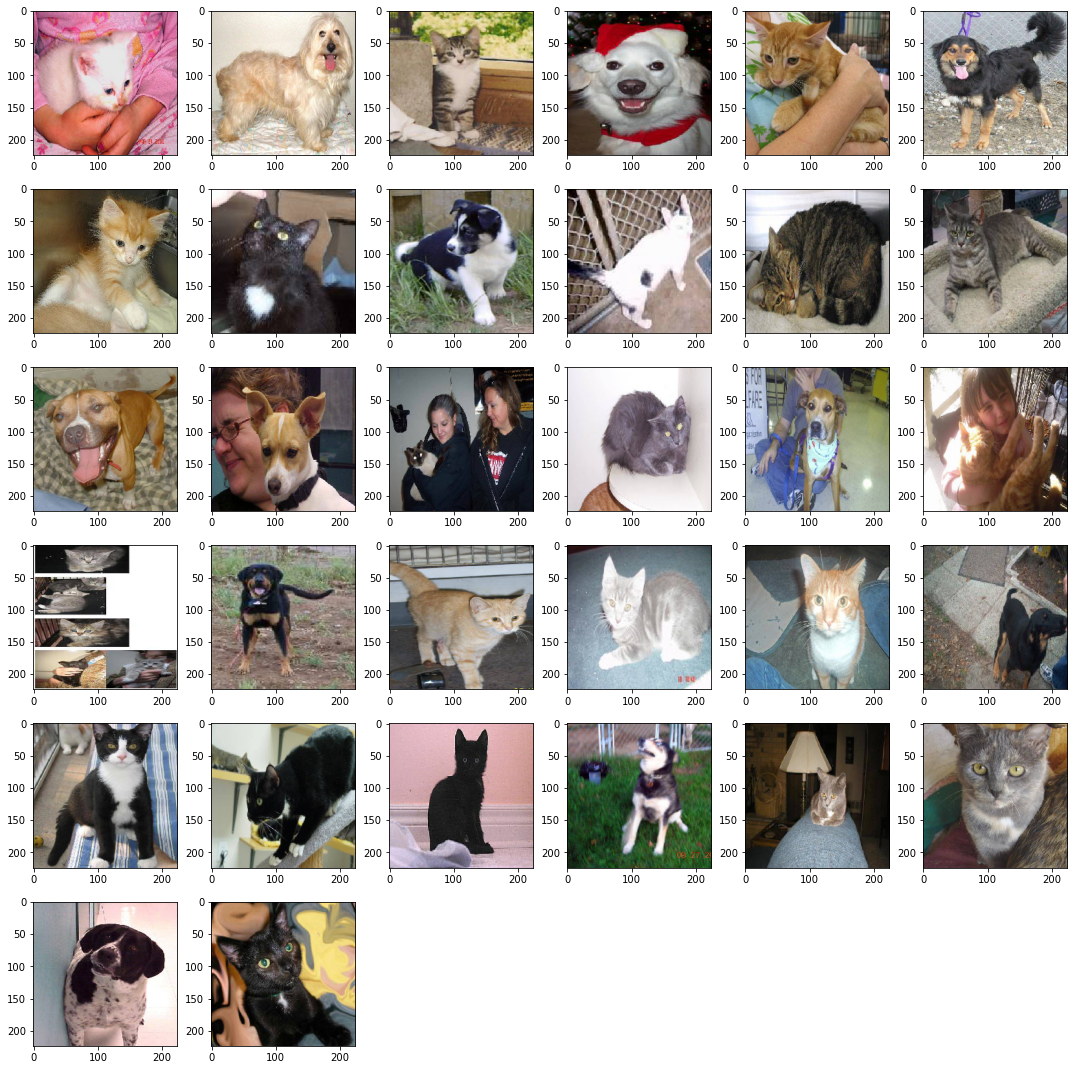

In [20]:
plt.figure(figsize=(15, 15))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(batch[0][i])

plt.tight_layout()
plt.show()

## 모델 구현

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

import numpy as np

In [11]:
def create_model():
    model = keras.Sequential()
    
    model.add(layers.Conv2D(filters=64, 
                            kernel_size=3, 
                            padding='same', 
                            activation='relu', 
                            input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(layers.MaxPool2D(padding="same"))

    model.add(layers.Conv2D(filters=64, 
                            kernel_size=3, 
                            padding="same", 
                            activation='relu'))
    model.add(layers.MaxPool2D(padding='same'))

    model.add(layers.Conv2D(filters=128, 
                            kernel_size=3, 
                            padding="same", 
                            activation='relu'))
    model.add(layers.MaxPool2D(padding='same'))

    model.add(layers.Conv2D(filters=128, 
                            kernel_size=3, 
                            padding="same", 
                            activation='relu'))
    model.add(layers.MaxPool2D(padding='same'))

    # Dense 레이어에 입력하기 위해 평탄화
    model.add(layers.Flatten())
    
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(units=512, activation='relu'))
    model.add(layers.Dense(units=1, activation='sigmoid')) 
# 이진분류시 (units= 1, 활성화 함수= sigmoid) ; 클래스가 1(양성)일 확률값 반환

    return model

In [24]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

## 모델 체크포인트와 얼리스탑 콜백 지정

In [28]:
import os
save_dir = os.path.join("./saved_models", "cat_dog_model", "basic")
print(save_dir)
os.makedirs(save_dir, exist_ok=True)

./saved_models\cat_dog_model\basic


In [29]:
save_file_path = os.path.join(save_dir, "weights_ckpt")

# 성능이 개선될 때 마다 체크포인트 생성 - 가중치(weight) 저장
mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_file_path, 
                                              save_weights_only=True, 
                                              save_best_only=True, 
                                              monitor='val_loss', 
                                              verbose=2)

# 성능이 일정 에포크 동안 개선되지 않으면 학습 중지
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", 
                                            patience=10,
                                            verbose=1)

## 구현한 모델 학습 및 결과 시각화
- loss: 0.0570 - accuracy: 0.9775 - val_loss: 1.2428 - val_accuracy: 0.6940
- 과대적합

In [30]:
hist = model.fit(train_iter, 
                 epochs=N_EPOCHS, 
                 steps_per_epoch=len(train_iter),
                 validation_data=valid_iter, 
                 validation_steps=len(valid_iter),
                 callbacks=[mc_callback, es_callback])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 63 steps, validate for 32 steps
Epoch 1/100
62/63 [============================>.] - ETA: 0s - loss: 0.6995 - accuracy: 0.5071
Epoch 00001: val_loss improved from inf to 0.69101, saving model to ./saved_models\cat_dog_model\basic\weights_ckpt
63/63 [==============================] - 20s 324ms/step - loss: 0.6995 - accuracy: 0.5045 - val_loss: 0.6910 - val_accuracy: 0.5020
Epoch 2/100
62/63 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.5183
Epoch 00002: val_loss did not improve from 0.69101
63/63 [==============================] - 13s 199ms/step - loss: 0.6933 - accuracy: 0.5170 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/100
62/63 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.5025
Epoch 00003: val_loss did not improve from 0.69101
63/63 [==============================] - 13s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
62/63 [============================>.] - ETA: 0

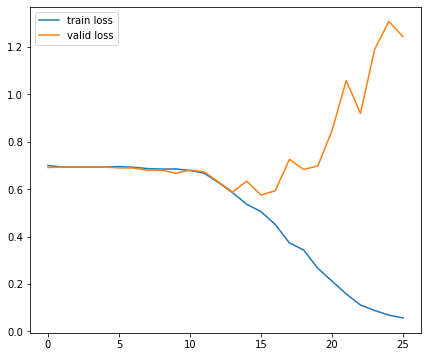

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='valid loss')
plt.legend()
plt.show()

In [32]:
save_model = create_model()
save_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [33]:
save_model.evaluate(test_iter)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


32/32 [==============================] - 2s 67ms/step - loss: 0.6932 - accuracy: 0.4990


[0.6932307742536068, 0.499]

## 최고 성능 가중치를 가지고 test_set 추론

In [34]:
save_model.load_weights(save_file_path)

In [35]:
save_model.evaluate(test_iter)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


32/32 [==============================] - 2s 62ms/step - loss: 0.5862 - accuracy: 0.7060


[0.5861565284430981, 0.706]

## 새로운 데이터를 가지고 분류 예측

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def load_preprocess_image(img_path):
    """
    img_path 이미지를 읽어서 추론할 수있는 ndarray로 변환해서 반환하는 함수
    1. 이미지 읽기
    2. ndarray 변환
    3. shape를 모델이 추론할 수 있는 형태로 변형 (개수, h, w, c)
    """
    
    raw_img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)) 
    img_array = img_to_array(raw_img)
    img_array = img_array[np.newaxis, ...]
    return (img_array/255.0).astype(np.float32)

In [37]:
dog = load_preprocess_image('./test_img/dog.jpg')
cat = load_preprocess_image('./test_img/cat.jpg')
dog.shape, cat.shape

((1, 224, 224, 3), (1, 224, 224, 3))

In [38]:
pred1 = save_model.predict(dog)
pred2 = save_model.predict(cat)

In [39]:
print(pred1)
result1 = np.where(pred1>0.5, 1, 0)[0]
result1

[[0.70302236]]


array([1])

In [40]:
print(pred2)
result2 = np.where(pred2>0.5, 1, 0)[0]
result2

[[0.4988023]]


array([0])

In [41]:
train_iter.class_indices

{'cats': 0, 'dogs': 1}

## 훈련 데이터셋 augmentation 적용

In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

np.random.seed(0)
tf.random.set_seed(0)

In [14]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 60

IMAGE_SIZE = 224

In [15]:
train_dir = "data/train"
valid_dir = "data/validation"
test_dir = "data/test"

In [16]:
# 훈련용 데이터에만 어그멘테이션 적용, 검증용은 적용 x

train_datagen = ImageDataGenerator(rescale=1/255.0, # 스케일링
                                   rotation_range=40, # 회전
                                   width_shift_range=0.2, # 좌우 이동
                                   height_shift_range=0.2, # 상하 이동
                                   shear_range=0.2, # 전단 변환
                                   zoom_range=0.2, # 확대, 축소
                                   horizontal_flip=True, # 좌우반전
                                   fill_mode='constant') # 공백픽셀 채우기

valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)


In [17]:
train_iter = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                               class_mode='binary', 
                                               batch_size=N_BATCHS)

valid_iter = valid_datagen.flow_from_directory(valid_dir, 
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                               class_mode='binary', 
                                               batch_size=N_BATCHS)

test_iter = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             class_mode='binary', 
                                             batch_size=N_BATCHS)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
batch_samples = next(train_iter)
print(type(batch_samples)) #(X-image, y-label)

<class 'tuple'>


In [19]:
batch_image_sample = batch_samples[0]
batch_image_sample.shape, batch_image_sample.dtype

((60, 224, 224, 3), dtype('float32'))

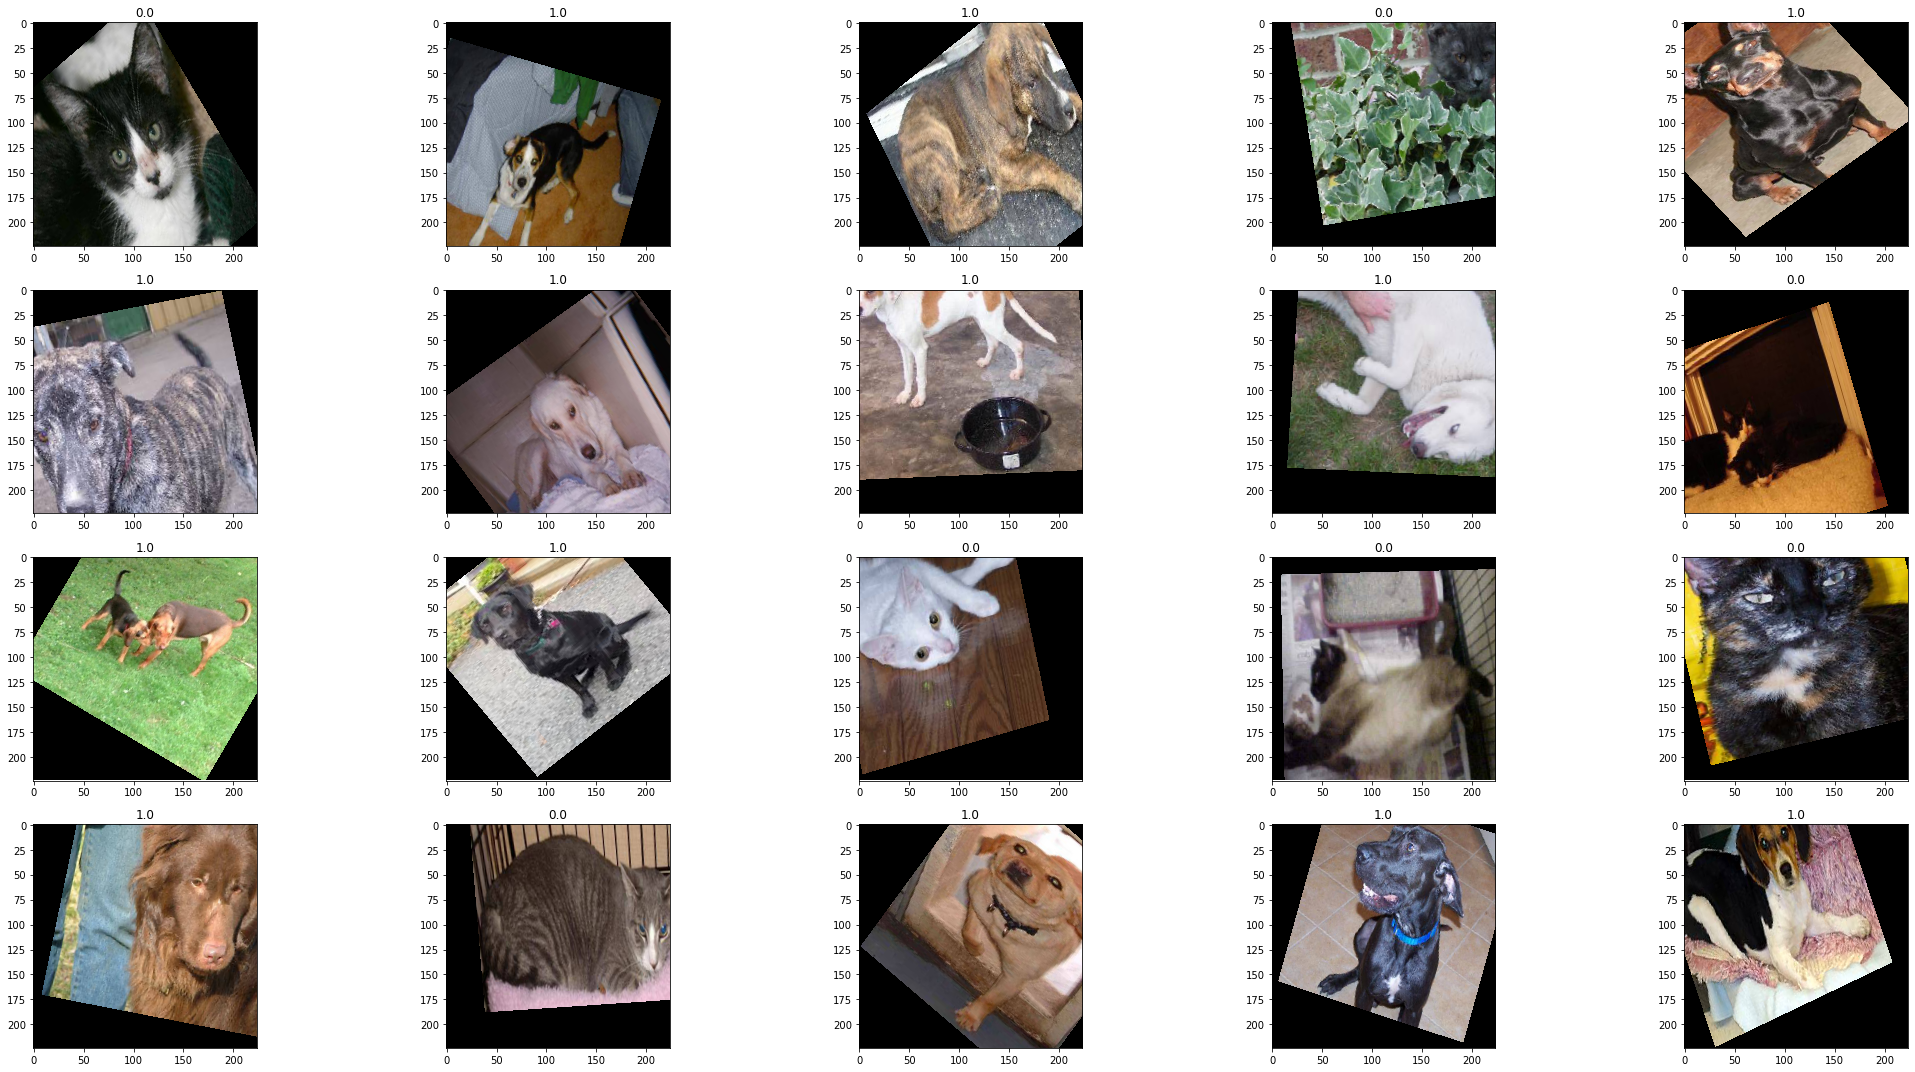

In [20]:
plt.figure(figsize=(30,15))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(batch_image_sample[i])
    plt.title(str(batch_samples[1][i]))

plt.tight_layout()
plt.show()

In [21]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy', metrics=['accuracy'])

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/t

In [22]:
save_dir = os.path.join("./saved_models", "cat_dog_model", "augmentation")
print(save_dir)
os.makedirs(save_dir, exist_ok=True)

./saved_models\cat_dog_model\augmentation


In [23]:
save_file_path = os.path.join(save_dir, 'weights_ckpt')

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_file_path, 
                                              save_weights_only=True, 
                                              save_best_only=True, 
                                              monitor='val_loss', 
                                              verbose=2)

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=2)

In [65]:
# tf.compat.v1.disable_eager_execution()

In [24]:
hist = model.fit(train_iter, 
                 epochs=N_EPOCHS, 
                 steps_per_epoch=len(train_iter), 
                 validation_data=valid_iter, 
                 validation_steps=len(valid_iter),
                 callbacks=[mc_callback, es_callback])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
  ...
    to  
  ['...']


  ...
    to  
  ['...']


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Train for 34 steps, validate for 17 steps
Epoch 1/100
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp

Epoch 7/100
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
33/34 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.4990Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Epoch 00007: val_loss did not improve from 0.69253
34/34 [==============================] - 16s 485ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 8/100
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
33/34 [============================>.] - ETA: 0s - loss: 0.6930 - accuracy: 0.4897Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhos

### 트러블 슈팅
**tensorflow.python.framework.errors_impl.ResourceExhaustedError** 

1. GPU 메모리 부족으로 인한 에러
    - batch 사이즈를 80에서 60으로 줄임으로서 해결

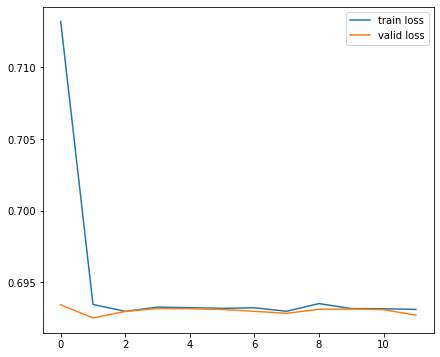

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='valid loss')
plt.legend()
plt.show()

In [26]:
saved_model_aug = create_model()
saved_model_aug.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

save_file_path = './saved_models/cat_dog_model/augmentation/weights_ckpt'
saved_model_aug.load_weights(save_file_path)

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RestoreV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in devic

In [27]:
saved_model_aug.evaluate(test_iter)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_4254 in device /job:localhost/replica:0/task:0/device:GPU:0
17/17 [==============================] - 4s 227ms/step - loss: 0.6926 - accuracy: 0.5170


[0.6926232015385347, 0.517]

In [28]:
dog2 = load_preprocess_image('./test_img/dog.jpg')
cat2 = load_preprocess_image('./test_img/cat.jpg')

pred3 = saved_model_aug.predict(dog2)
pred4 = saved_model_aug.predict(cat2)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_4414 in device /job:localhost/replica:0/task:0

In [29]:
pred3

array([[0.5050452]], dtype=float32)

In [30]:
pred4

array([[0.5038529]], dtype=float32)

## flow_from_dataframe 방식
- 데이터를 경로(path)와 클래스(label)로 구분

### 데이터 묶음 다운로드

In [31]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='17ejPJw42TgTv0jCPMMlVTHwF57XYE2kb',
                                    dest_path='./data/cats_and_dogs_union.zip',
                                    unzip=True)

Unzipping...Done.


### glob모듈을 이용해 경로 리스트로 만들기

In [32]:
from glob import glob
path_list = glob('./data/**/*.jpg')
type(path_list)

list

In [43]:
len(path_list)

4000

In [33]:
label_list = []
for path in path_list:
    label = os.path.basename(path).split('.')[0]
    label_list.append(label)

In [34]:
label_list[-10:]

['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog']

In [35]:
label_list2 = [os.path.basename(path).split('.')[0] for path in path_list]
label_list2[:10]

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']

In [36]:
import pandas as pd
d = {
    'path':path_list,
    'label':label_list
}
df = pd.DataFrame(d)
df.shape

(4000, 2)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    4000 non-null   object
 1   label   4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [38]:
df.describe()

path label
count                    4000  4000
unique                   4000     2
top     ./data\cats\cat.0.jpg   cat
freq                        1  2000

In [39]:
df['label'].value_counts()

cat    2000
dog    2000
Name: label, dtype: int64

In [40]:
df.head()

path label
0     ./data\cats\cat.0.jpg   cat
1     ./data\cats\cat.1.jpg   cat
2    ./data\cats\cat.10.jpg   cat
3   ./data\cats\cat.100.jpg   cat
4  ./data\cats\cat.1000.jpg   cat

In [41]:
df.tail()

path label
3995  ./data\dogs\dog.995.jpg   dog
3996  ./data\dogs\dog.996.jpg   dog
3997  ./data\dogs\dog.997.jpg   dog
3998  ./data\dogs\dog.998.jpg   dog
3999  ./data\dogs\dog.999.jpg   dog

In [56]:
df.to_csv('./cat_dog_path.csv', index=False)

In [44]:
cat_df = df[df['label']=='cat']

dog_df = df[df['label']=='dog']
cat_df.shape, dog_df.shape

((2000, 2), (2000, 2))

In [45]:
cat_df['label'].value_counts()
dog_df['label'].value_counts()

dog    2000
Name: label, dtype: int64

In [46]:
idx = 1600
train_df = pd.concat([cat_df.iloc[:idx], dog_df.iloc[:idx]], axis=0)

test_df = pd.concat([cat_df.iloc[idx:], dog_df.iloc[idx:]], axis=0)

train_df.shape, test_df.shape

((3200, 2), (800, 2))

In [47]:
train_df['label'].value_counts()

cat    1600
dog    1600
Name: label, dtype: int64

In [48]:
test_df['label'].value_counts()

cat    400
dog    400
Name: label, dtype: int64

In [49]:
train_df.to_csv('./cat_dog_path_train.csv', index=False)
test_df.to_csv('./cat_dog_path_test.csv', index=False)

## 이미지데이터 제너레이터 생성 - 어그멘태이션

In [50]:
train_datagen = ImageDataGenerator(rescale=1/255.0, 
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   brightness_range=[0.7, 1.3],
                                   fill_mode='constant')

valid_datagen = ImageDataGenerator(rescale=1/255.0)

In [51]:
train_iter = train_datagen.flow_from_dataframe(train_df,
                                               x_col="path",
                                               y_col='label',
                                               class_mode='binary',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=N_BATCHS
                                               )

valid_iter = valid_datagen.flow_from_dataframe(test_df,
                                               x_col="path",
                                               y_col='label',
                                               class_mode='binary',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=N_BATCHS)

Found 3200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


In [52]:
train_iter.class_indices

{'cat': 0, 'dog': 1}

## 모델 컴파일 및 학습

In [53]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


In [54]:
hist = model.fit(train_iter, 
                 epochs=1, 
                 steps_per_epoch=len(train_iter), 
                 validation_data=valid_iter, 
                 validation_steps=len(valid_iter))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
  ...
    to  
  ['...']


  ...
    to  
  ['...']


Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train for 54 steps, validate for 14 steps
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica